# Visualize Molecule Thermo
This ipython notebook aims to help people compare thermo from different sources

### Necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import rmgpy
from rmgpy.data.rmg import RMGDatabase
from rmgpy.species import Species
from rmgpy.thermo.thermodata import ThermoData
from rmgpy.thermo.nasa import NASA, NASAPolynomial

from easy_rmg_model.rmg2arc.thermo_db import (load_thermo_database,
                                              load_thermo_lib_by_path,
                                             )
from easy_rmg_model.plotter import compare_thermo

%load_ext autoreload
%autoreload 2

### 1. Load thermo library

In [2]:
thermo_libraries = ['DFT_QCI_thermo']
non_builtin_libraries = []

thermo_db = load_thermo_database(libraries=thermo_libraries)
for lib in non_builtin_libraries:
    load_thermo_lib_by_path(lib, thermo_db)

### 2. Load species

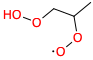

In [3]:
s = Species().from_smiles('OOCC(C)O[O]')
s

### 3. Load thermo from RMG database

In [4]:
thermos = [thermo[0] for thermo in thermo_db.get_all_thermo_data(s)]

### [OPTIONAL] Add additional thermo entry in ThermoData format

In [5]:
thermo = ThermoData(
    Tdata=([300, 400, 500, 600, 800, 1000, 1500], 'K'),
    Cpdata=([40, 42, 46, 50, 55, 59, 66], 'cal/(mol*K)'),
    H298=(-32, 'kcal/mol'),
    S298=(96, 'cal/(mol*K)'),
    comment='from Sharma et al.'
    )

thermos.append(thermo)

### [OPTIONAL] Add additional Thermo entry in NASA format

In [6]:
thermo = NASA(
    polynomials = [
        NASAPolynomial(coeffs=[3.75766,0.0155412,0.000220775,-5.13539e-07,3.48339e-10,-20500.4,13.5949], Tmin=(10,'K'), Tmax=(505.888,'K')),
        NASAPolynomial(coeffs=[4.23893,0.058009,-4.23495e-05,1.40191e-08,-1.72225e-12,-21141.2,5.74875], Tmin=(505.888,'K'), Tmax=(3000,'K')),
    ],
    Tmin = (10,'K'),
    Tmax = (3000,'K'),
    E0 = (-170.514,'kJ/mol'),
    Cp0 = (33.2579,'J/(mol*K)'),
    CpInf = (311.793,'J/(mol*K)'),
    comment='from Dong (RRHO + 1DHR)',
)
thermos.append(thermo)

### Plot the comparison plot

Generate the legends for the figure

In [7]:
legends = []
for thermo in thermos:
    if 'Thermo group additivity estimation' in thermo.comment:
        # Some comments for GAV can be very long, shorten it
        legends.append('GAV')
    else:
        legends.append(thermo.comment)

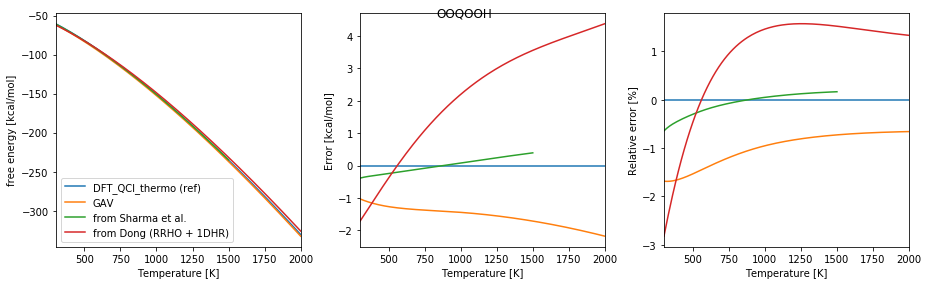

In [8]:
compare_thermo(entry_list=thermos,
               thermo_property='free energy',
               reference_entry=0,
               fig_title='OOQOOH',
               T_min=300,
               T_max=2000,
               legends=legends,
               size=4)